In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1)
plt.style.use('dark_background')

# Tokens, logits, and colors
tokens = ['A', 'B', 'C', 'D']
logits = np.array([3, 2, 1, -1])
colors = ['magenta', 'teal', 'cyan', 'skyblue']

# Softmax function with temperature scaling
def softmax_with_temperature(logits, T):
    """Compute the softmax probabilities with 
    temperature scaling."""
    scaled_logits = logits / T
    exp_logits = np.exp(
        scaled_logits - np.max(scaled_logits)
    )  # For numerical stability
    return exp_logits / exp_logits.sum()

# Function to sample from probabilities
def sample_from_probabilities(probs):
    """Sample an index from the given probability 
    values of multinomial distribution."""
    return np.random.choice(len(probs), p=probs)

# Temperatures to visualize
temperatures = [0.5, 0.75, 1, 1.5]

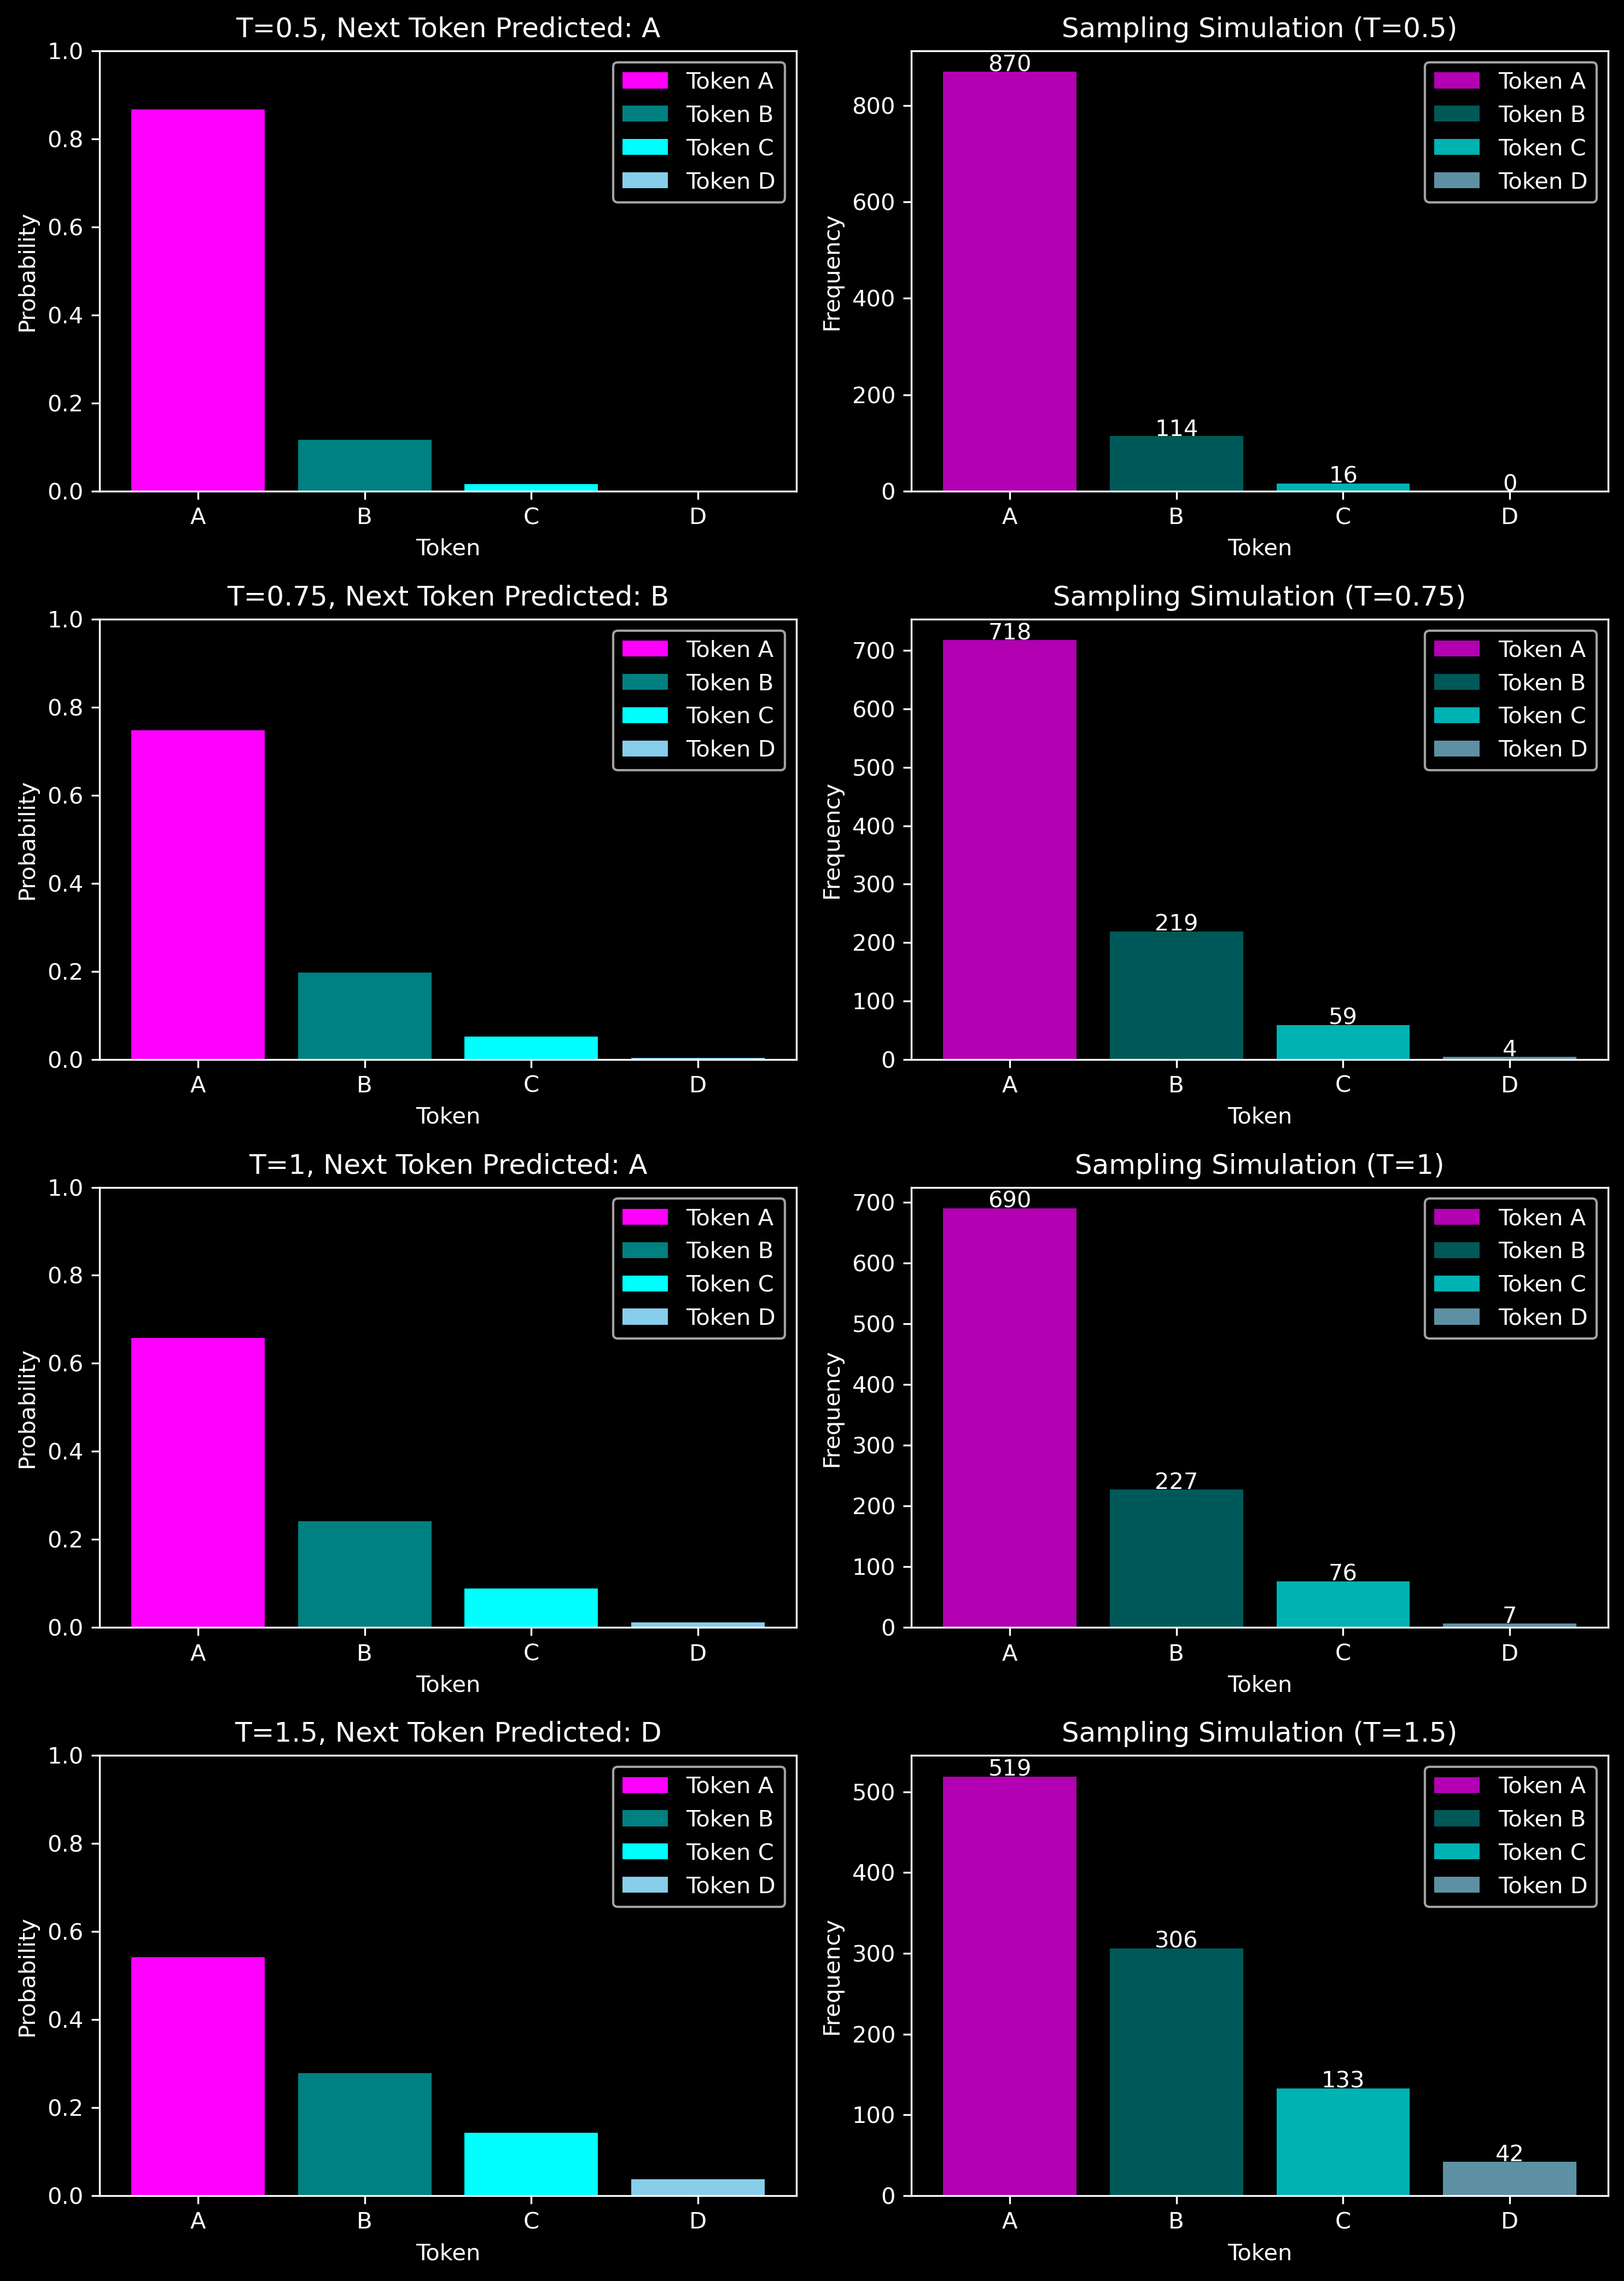

In [2]:

# Combined figure
fig, axes = plt.subplots(4, 2, figsize=(10, 14), dpi=300)

for i, T in enumerate(temperatures):
    # Compute softmax probabilities
    probs = softmax_with_temperature(logits, T)
    
    # Sample next token
    next_token_index = sample_from_probabilities(probs)
    next_token = tokens[next_token_index]
    
    # Left side: Plot probabilities
    ax_left = axes[i, 0]
    for token, prob, color in zip(tokens, probs, colors):
        ax_left.bar(token, prob, color=color, label=f"Token {token}")
    ax_left.set_title(f"T={T}, Next Token Predicted: {next_token}")
    ax_left.set_xlabel("Token")
    ax_left.set_ylabel("Probability")
    ax_left.set_ylim(0, 1)
    ax_left.legend()
    
    # Right side: Sampling simulation results
    # Perform 1000 sampling trials
    sampled_indices = [sample_from_probabilities(probs) for _ in range(1000)]
    sampled_tokens = [tokens[idx] for idx in sampled_indices]
    
    # Plot histogram of sampled tokens with frequency text
    ax_right = axes[i, 1]
    for j, token in enumerate(tokens):
        token_count = sampled_tokens.count(token)
        ax_right.bar(token, token_count, color=colors[j], alpha=0.7, label=f"Token {token}")
        ax_right.text(token, token_count + 1, str(token_count), color='white', ha='center')  # Add frequency text

    ax_right.set_title(f"Sampling Simulation (T={T})")
    ax_right.set_xlabel("Token")
    ax_right.set_ylabel("Frequency")
    ax_right.legend(loc="upper right")


plt.tight_layout()
plt.show()

### **Temperature-Scaled Softmax**
- **Formula:**  
  $P(y_i \mid \mathbf{z}) = \frac{\exp(z_i / T)}{\sum_{j=1}^n \exp(z_j / T)}$  
- **Key Points:**  
  - $T > 1$: Flattens probabilities → More exploration (creativity).  
  - $T < 1$: Sharpens probabilities → More confident predictions.  

---

### **Multinomial Distribution + Creativity**
- **Process:**  
  1. Apply temperature-scaled softmax to logits.  
  2. Use multinomial sampling to pick an output.  
- **Effect of $T$:**  
  - High $T$: Diverse, creative outputs.  
  - Low $T$: Predictable, focused outputs.  

---

### **Applications:**
1. **Text Generation (e.g., GPT):** Control creativity.  
2. **Action Selection (RL):** Balance exploration/exploitation.  
3. **Creative Models:** Diverse music, image outputs.  

**Key:** $T$ is the creativity knob!